# Data Processing

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from datasets import load_dataset
import re

# Load the dataset
# dataset = load_dataset("BothBosu/scam-dialogue")
dataset = load_dataset("menaattia/phone-scam-dataset")
# Convert to pandas DataFrame
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

train_df.rename(columns={'dialogue': 'text'}, inplace=True)
test_df.rename(columns={'dialogue': 'text'}, inplace=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train_dataset.csv:   0%|          | 0.00/621k [00:00<?, ?B/s]

test_dataset.csv:   0%|          | 0.00/154k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3200 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/800 [00:00<?, ? examples/s]

In [ ]:
train_df['text']

# train_df['text'][134]
train_df['text'][1727]

'caller: Morning, it’s the school office. Your child left their lunchbox at school. receiver: Thank you! I’ll get it at pick-up. caller: We’ll keep it safe until then.'

In [ ]:
# Function to extract caller parts
def extract_caller(text):
    caller_parts = re.findall(r'caller:\s*(.+?)(?=\s*receiver:|$)', text, flags=re.IGNORECASE)
    # caller_parts = re.findall(r'caller:\s*(.*?)(?=\s*receiver:|caller:|$)', text, re.IGNORECASE | re.DOTALL)

    return ' '.join(caller_parts).strip()


train_df['text'] = train_df['text'].apply(extract_caller)
test_df['text'] = test_df['text'].apply(extract_caller)

In [ ]:
train_df.shape

(3200, 2)

In [ ]:
test_df.shape

(800, 2)

In [ ]:
print((train_df.label == 1).sum()) # scam
print((train_df.label == 0).sum()) # Not scam

1600
1600


In [ ]:
train_df['text']

,text
0,"Hello, this is Rita from your bank. We noticed..."
1,"Hi, it’s Chris from the running group. We’re m..."
2,"Hello, this is Zoe from Harmony Yoga. I wanted..."
3,We’re giving exclusive investment tips. Send y...
4,"Hi, your friend asked us to deliver a package ..."
...,...
3195,Your hardware warranty is expiring. Continue c...
3196,Act now to clear your record for speeding tick...
3197,This is Microsoft support. We've found malware...
3198,This is your HR department. We’re updating pay...


In [ ]:
sample_length = train_df['text'].str.split().str.len()

In [ ]:
sample_length.min()

6

In [ ]:
sample_length.max()

63

In [ ]:
train_df['text'].isna().sum()

0

In [ ]:
import string

def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

In [ ]:
train_df["text"] = train_df.text.map(remove_punct)

In [ ]:
train_df['text']

,text
0,Hello this is Rita from your bank We noticed a...
1,Hi it’s Chris from the running group We’re mee...
2,Hello this is Zoe from Harmony Yoga I wanted t...
3,We’re giving exclusive investment tips Send yo...
4,Hi your friend asked us to deliver a package t...
...,...
3195,Your hardware warranty is expiring Continue co...
3196,Act now to clear your record for speeding tick...
3197,This is Microsoft support Weve found malware o...
3198,This is your HR department We’re updating payr...


In [ ]:
train_df['text'].isna().sum()

0

In [ ]:
# remove stopwords
# pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them
# as the result of a search query.
stop = set(stopwords.words("english"))

# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(train_df['text'][1279])
print(remove_stopwords(train_df['text'][1279]))

Your online store order failed Please pay again or lose your items Must be an error just pay to resolve
online store order failed please pay lose items must error pay resolve


In [ ]:
train_df["text"] = train_df.text.map(remove_stopwords)

In [ ]:
train_df['text']

,text
0,hello rita bank noticed duplicate transaction ...
1,hi it’s chris running group we’re meeting 7 su...
2,hello zoe harmony yoga wanted let know we’ve g...
3,we’re giving exclusive investment tips send in...
4,hi friend asked us deliver package there’s unp...
...,...
3195,hardware warranty expiring continue coverage g...
3196,act clear record speeding tickets pay gift car...
3197,microsoft support weve found malware computer ...
3198,hr department we’re updating payroll details p...


In [ ]:
train_df['text'].isna().sum()

0

In [ ]:
test_df["text"] = test_df.text.map(remove_punct)
test_df["text"] = test_df.text.map(remove_stopwords)

In [ ]:
test_df['text']

,text
0,hi mrs gomez sara daycare ben’s pickup 4 today...
1,hello greg tiny sprouts preschool child attend...
2,ebay refund waiting confirm paypal login
3,hi city electric office we’re conducting sched...
4,google account suspended soon prevent please v...
...,...
795,noticed problem paypal account please verify l...
796,hello computer hacked let remote fix monitor t...
797,greetings youve selected special investment op...
798,hi nguyen residence margo waste collection ser...


In [ ]:
train_df['word_count'] = train_df['text'].str.split().str.len()

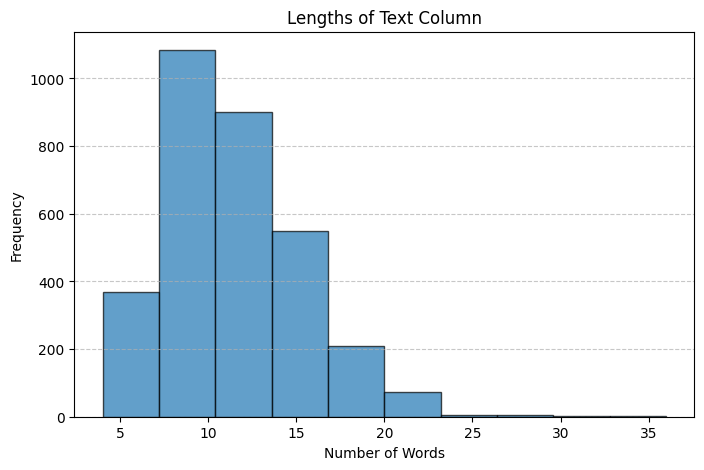

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(train_df['word_count'], bins=10, edgecolor='black', alpha=0.7)  # Adjust bins as needed
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Lengths of Text Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
max_length = train_df['word_count'].max()
print("Maximum number of words in a text entry:", max_length)

Maximum number of words in a text entry: 36


In [ ]:
train_df.to_csv("processed_train1.csv", index=False)

In [ ]:
test_df.to_csv("processed_test1.csv", index=False)

In [ ]:
# df = pd.read_csv("scam_dataset.csv")

# # Check dataset structure
# print(df.head())

# texts = df['TEXT'].astype(str).values
# df['label'] = 1
# labels = df['label'].values

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     texts, labels, test_size=0.2, random_state=42
# )

# print(type(train_df["TEXT"]))

# # Convert X_train and X_test to Series before concatenation
# X_train = pd.Series(X_train)  # Convert X_train to Series
# X_test = pd.Series(X_test)
# y_train = pd.Series(y_train)
# y_test = pd.Series(y_test)

# X_train = np.array(pd.concat([X_train, train_df['TEXT']], ignore_index=True))
# X_test = np.array(pd.concat([X_test, test_df['TEXT']], ignore_index=True))
# y_train = np.array(pd.concat([y_train, train_df['label']], ignore_index=True))
# y_test = np.array(pd.concat([y_test, test_df['label']], ignore_index=True))

In [ ]:
# Combine the scam-signature telephone dataset with non-scam examples

from sklearn.model_selection import train_test_split

df_scam = pd.read_csv('scam_dataset.csv')
df_scam['label'] = 1


df_nonscam = pd.read_csv('non_scam.csv')
df_nonscam['label'] = 0
df_nonscam = df_nonscam.sample(n=2000)
df_nonscam_train, df_nonscam_test = train_test_split(df_nonscam, test_size=0.2, random_state=42)

df_nonscam = df_nonscam_test.sample(n=74)

In [ ]:
df_eval = pd.concat([df_scam, df_nonscam])
df_eval_shuffled = df_eval.sample(frac=1 , random_state=42).reset_index(drop=True)

df_eval_shuffled

,dialogue,label
0,"caller: Hello, I’m Mark from the cable company...",0
1,caller: We are calling you from the IRS. We ar...,1
2,"caller: Hi Mom, it’s me. I just wanted to let ...",0
3,caller: Your car had been parked in a no-parki...,1
4,"caller: Hello, I’m with the Town Rec Center. A...",0
...,...,...
143,"caller: You sound trustful, and the investment...",1
144,"caller: Hi, I’m from your local post office. W...",0
145,caller: Due to suspicious activity related to ...,1
146,"caller: Hi, it’s Anna from PetCare Clinic. Jus...",0


In [ ]:
df_eval_shuffled.to_csv("scam_dataset_eval.csv", index=False)

In [ ]:
# preprocess
df = pd.read_csv("scam_dataset_eval.csv")
df.rename(columns={'dialogue': 'text'}, inplace=True)

# Check dataset structure
print(df.head())
df['text'] = df['text'].apply(extract_caller)
df['text'] = df.text.map(remove_punct)
df['text'] = df.text.map(remove_stopwords)
df.to_csv("scam_dataset_eval_processed.csv", index=False)

                                                text  label
0  caller: Hello, I’m Mark from the cable company...      0
1  caller: We are calling you from the IRS. We ar...      1
2  caller: Hi Mom, it’s me. I just wanted to let ...      0
3  caller: Your car had been parked in a no-parki...      1
4  caller: Hello, I’m with the Town Rec Center. A...      0


In [ ]:
# combine the two synthetic datasets
df_train = pd.read_csv('processed_train.csv')
df_train1 = pd.read_csv('processed_train1.csv')
df_train = pd.concat([df_train, df_train1])
df_train = df_train.sample(frac=1 , random_state=42).reset_index(drop=True)
df_train.to_csv("combined_processed_train.csv", index=False)


df_test = pd.read_csv('processed_test.csv')
df_test1 = pd.read_csv('processed_test1.csv')
df_test = pd.concat([df_test, df_test1])
df_test = df_test.sample(frac=1 , random_state=42).reset_index(drop=True)
df_test.to_csv("combined_processed_test.csv", index=False)